<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Unsupervised_learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised learning in Python

course by DataCamp

modified learning notes and solved exercises by me


> Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. 

> Or perhaps you have a set of texts, such as wikipedia pages, and you wish to segment them into categories based on their content.

This is the world of unsupervised learning, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data.

##Clustering for dataset exploration

**Supervised vs unsupervised learning**

An example of **supervised learning** is using the measurements of tumors to classify them as benign or cancerous. In this case, the pattern discovery is guided, or "supervised", so that the patterns are as useful as possible for predicting the label: benign or cancerous. 

**Unsupervised learning**, *in contrast, is learning without labels*. 

It is pure pattern discovery, unguided by a prediction task.


Throughout this course, datasets like this will be written as two-dimensional numpy arrays.
* The columns of the array will correspond to the features.
* The measurements for individual plants are the samples of the dataset. These correspond to rows of the array.

**k-means clustering**

k-means finds a specified number of clusters in the samples. It's implemented in the scikit-learn or "sklearn" library. 

**k-means clustering with scikit-learn**

* import kmeans from scikit-learn
```
from sklearn.cluster import KMeans
```

* create a kmeans model, specifying the number of clusters you want to find
```
model = KMeans(n_clusters=3)
```

(Let's specify 3 clusters, since there are three species of iris)


* call the fit method of the model, passing the array of samples

```
model.fit(samples)
```
```
KMeans(algorithm='auto', ...)
```

> This fits the model to the data, by locating and remembering the regions where the different clusters occur

* use the predict method of the model on these same samples. This returns a cluster label for each sample, indicating to which cluster a sample belongs. Let's assign the result to labels, and print it out.

```
labels = model.predict(samples)
print(labels)
```
```
[0 0 1 1 0 1 2 1 0 1 ...]
```

**Cluster labels for new samples**

If someone comes along with some new samples, **k-means can determine to which clusters they belong without starting over**. k-means does this *by remembering the mean (or average) of the samples in each cluster*. These are called the "**centroids**". New samples are assigned to the cluster whose centroid is closest.

* To assign the new samples to the existing clusters, pass the array of new samples to the predict method of the kmeans model. This returns the cluster labels of the new samples.

```
print(new_samples)
[[ 5.7 4.4 1.5 0.4]
[ 6.5 3. 5.5 1.8]
[ 5.8 2.7 5.1 1.9]]
```
```
new_labels = model.predict(new_samples)
print(new_labels)
[0 2 1]
```

**Scatter plots**

Later we'll learn how to evaluate quality of clustering.  But for now, let's visualize our clustering of the iris samples using scatter plots. 

> Here is a scatter plot of the sepal length vs petal length of the iris samples. Each point represents an iris sample, and is colored according to the cluster of the sample.

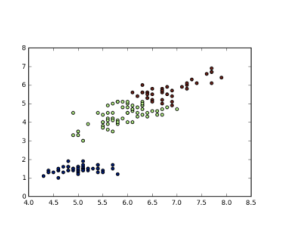



Get the x- and y- co-ordinates of each sample. 
* Sepal length is in the 0th column of the array, 
* while petal length is in the 2nd column. 

Now call the plt dot scatter function, passing the x- and y- co-ordinates and specifying c=labels to color by cluster label. 

```
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()
```

**Clustering 2D points**

Create a KMeans model to find 3 clusters, and fit it to the data points. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

* Import KMeans from sklearn.cluster.
* Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
* Use the .fit() method of model to fit the model to the array of points points.
* Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.

```
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)
```

```
<script.py> output:
    [1 2 0 1 2 1 2 2 2 0 1 2 2 0 0 2 0 0 2 2 0 2 1 2 1 0 2 0 0 1 1 2 2 2 0 1 2
     2 1 2 0 1 1 0 1 2 0 0 2 2 2 2 0 0 1 1 0 0 0 1 1 2 2 2 1 2 0 2 1 0 1 1 1 2
     1 0 0 1 2 0 1 0 1 2 0 2 0 1 2 2 2 1 2 2 1 0 0 0 0 1 2 1 0 0 1 1 2 1 0 0 1
     0 0 0 2 2 2 2 0 0 2 1 2 0 2 1 0 2 0 0 2 0 2 0 1 2 1 1 2 0 1 2 1 1 0 2 2 1
     0 1 0 2 1 0 0 1 0 2 2 0 2 0 0 2 2 1 2 2 0 1 0 1 1 2 1 2 2 1 1 0 1 1 1 0 2
     2 1 0 1 0 0 2 2 2 1 2 2 2 0 0 1 2 1 1 1 0 2 2 2 2 2 2 0 0 2 0 0 0 0 2 0 0
     2 2 1 0 1 1 0 1 0 1 0 2 2 0 2 2 2 0 1 1 0 2 2 0 2 0 0 2 0 0 1 0 1 1 1 2 0
     0 0 1 2 1 0 1 0 0 2 1 1 1 0 2 2 2 1 2 0 0 2 1 1 0 1 1 0 1 2 1 0 0 0 0 2 0
     0 2 2 1]
```

> You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful.

**Inspect your clustering**

* Import matplotlib.pyplot as plt.
* Assign column 0 of new_points to xs, and column 1 of new_points to ys.
* Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
* Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
* Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
* Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

```
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha=0.5)
plt.show()
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()
```

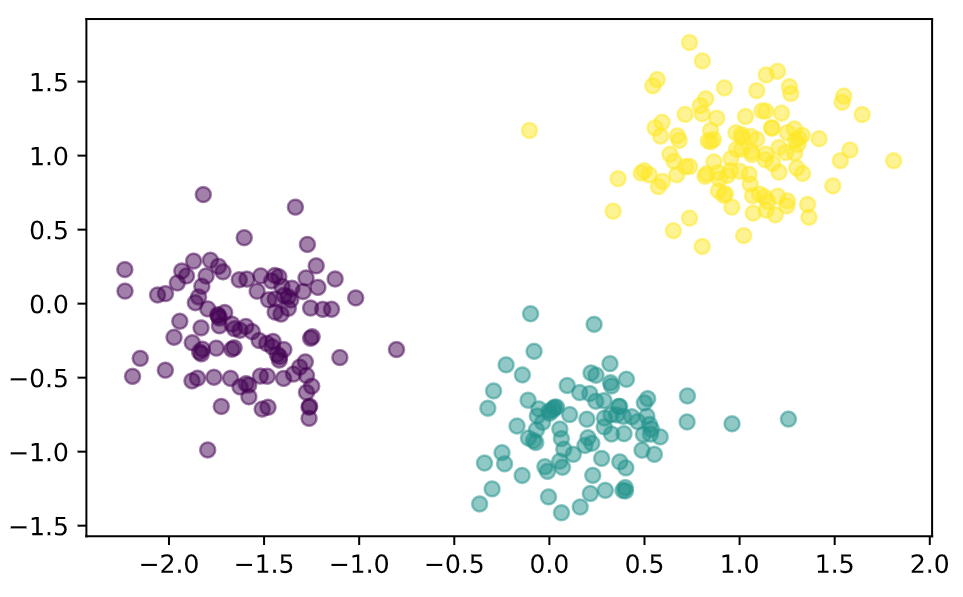

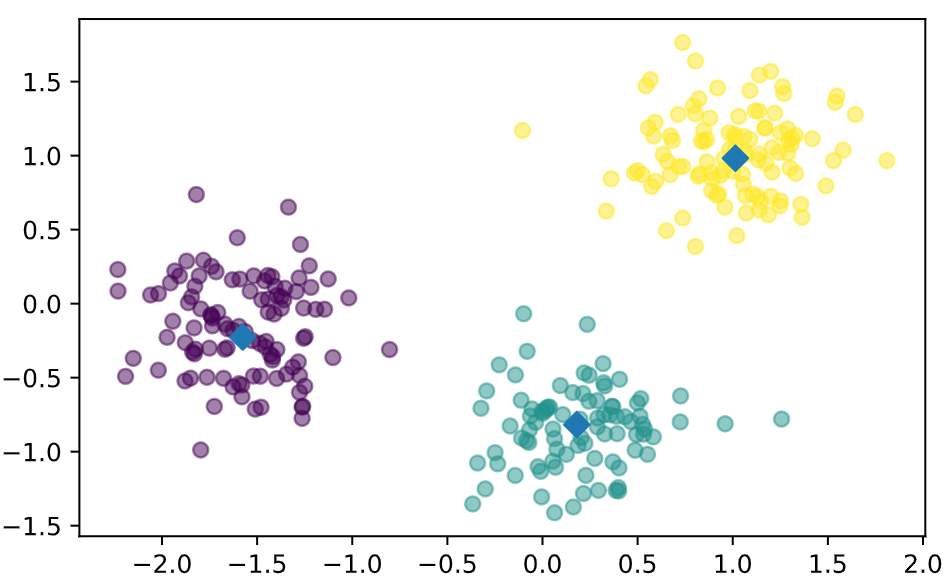

> The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering?

###Evaluating a clustering

A direct approach is to compare the clusters with the iris species (in dataset).

Let's check whether the 3 clusters of iris samples have any correspondence to the iris species. The correspondence is described by this table. 

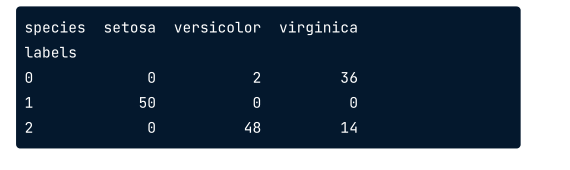

There is one column for each of the three species of iris: setosa, versicolor and virginica, and one row for each of the three cluster labels: 0, 1 and 2.

The table shows the number of samples that have each possible cluster label/species combination.

> For example, we see that cluster 1 corresponds perfectly with the species setosa.

On the other hand, while cluster 0 contains mainly virginica samples, there are also some virginica samples in cluster 2.

Tables like these are called "cross-tabulations".

**Cross tabulation with pandas**

* Import pandas, and then create a two-column DataFrame, where the first column is cluster labels and the second column is the iris species, so that each row gives the cluster label and species of a single sample.

```
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)
```
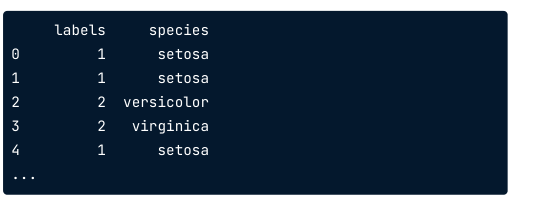


* use the pandas crosstab function to build the cross tabulation, passing the two columns of the DataFrame. 

```
ct = pd.crosstab(df['labels'], df['species'])
print(ct)
```

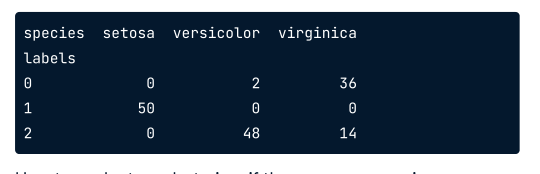

>Cross tabulations like these provide great insights into which sort of samples are in which cluster. But in most datasets, the samples are not labelled by species. How can the quality of a clustering be evaluated in these cases?

**Measuring clustering quality**
We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves. A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out.

How spread out the samples within each cluster are can be measured by the "**inertia**". Inertia measures how far samples are from their centroids.

> We want clusters that are not spread out, so lower values of the inertia are better.

The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. In fact, **kmeans aims to place the clusters in a way that minimizes the inertia**.

```
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)
78.9408414261
```

Here is a plot of the inertia values of clusterings of the iris dataset with different numbers of clusters. 



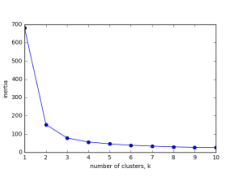

Our kmeans model with 3 clusters has relatively low inertia, which is great. 

> But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose?

* A good clustering has tight clusters (so low inertia)
* ... but not too many clusters!
* Choose an "elbow" in the inertia plot
* Where inertia begins to decrease more slowly
* E.g., for iris dataset, 3 is a good choice

**How many clusters of grain?**

ou are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

* For each of the given values of k, perform the following steps:
* Create a KMeans instance called model with k clusters.
* Fit the model to the grain data samples.
* Append the value of the inertia_ attribute of model to the list inertias.

```
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
```

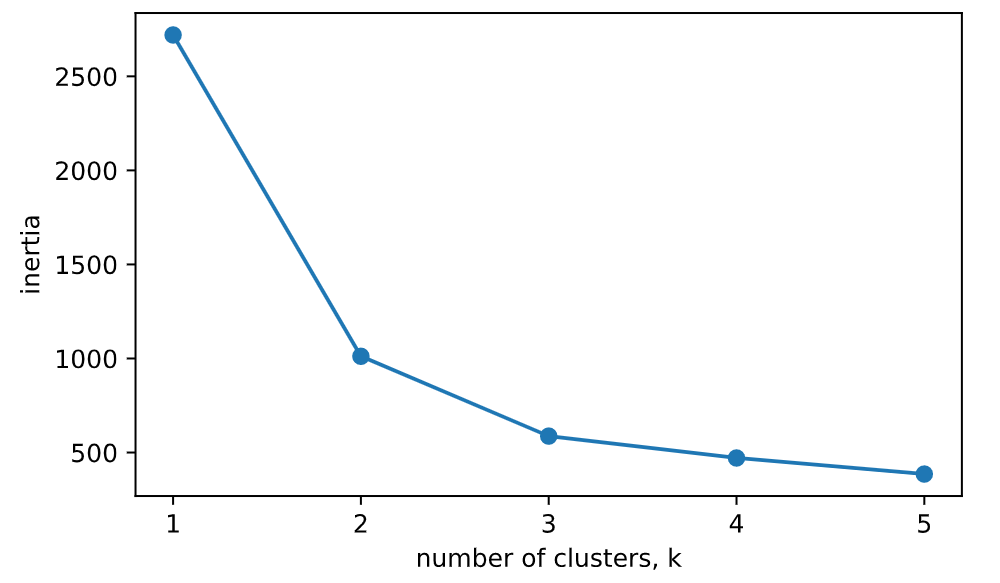

>  The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

**Evaluating the grain clustering**

Cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. 

* Create a KMeans model called model with 3 clusters.
* Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
* Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
* Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.

```
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)
```

```
<script.py> output:
    varieties  Canadian wheat  Kama wheat  Rosa wheat
    labels                                           
    0                       0           1          60
    1                      68           9           0
    2                       2          60          10
```

> The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. 

Is there anything you can do in such situations to improve your clustering?

###Transforming features for better clusterings

Let's take the array of samples and use KMeans to find 3 clusters.

There are three varieties of wine, so let's use pandas crosstab to check the cluster label - wine variety correspondence. 

```
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

df = pd.DataFrame({'labels': labels,
'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
```

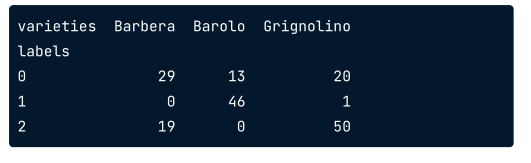
> The KMeans clusters don't correspond well with the wine varieties.



The problem is that the features of the wine dataset have very different variances. The variance of a feature measures the spread of its values. 

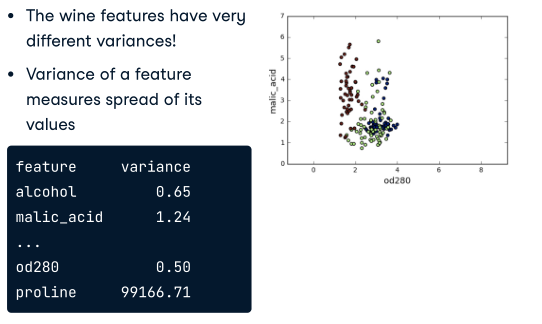
> For example, the malic acid feature has a higher variance than the od280 feature, and this can also be seen in their scatter plot. 

> The differences in some of the feature variances is enormous, as seen here, for example, in the scatter plot of the od280 and proline features.

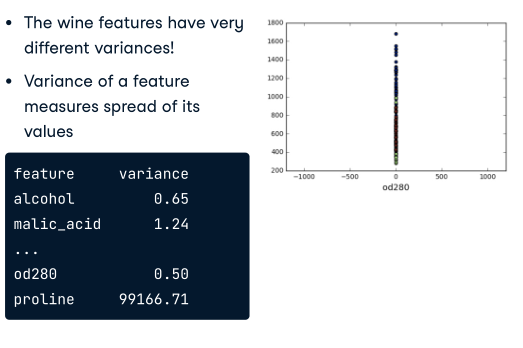

**StandardScaler**

In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm.

> To give every feature a chance, the data needs to be transformed so that features have equal variance. 

 This can be achieved with the **StandardScaler**. *It transforms every feature to have mean 0 and variance 1.*

 The resulting "standardized" features can be very informative. Using standardized od280 and proline, for example, the three wine varieties are much more distinct.

 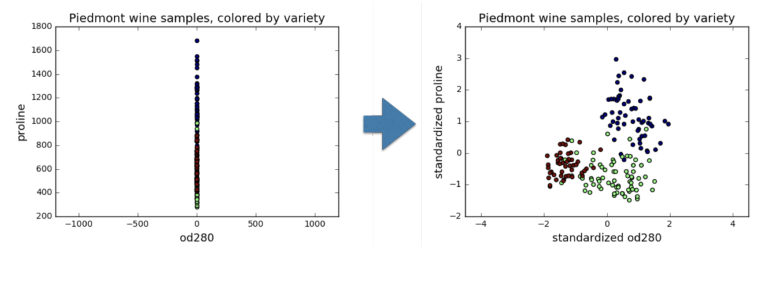

Let's see the StandardScaler in action

* import StandardScaler from sklearn.preprocessing.
```
from sklearn.preprocessing import StandardScaler
```

* create a StandardScaler object, and fit it to the samples.

```
scaler = StandardScaler()
scaler.fit(samples)
```

*  The transform method can now be used to standardize any samples, either the same ones, or completely new ones.

```
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)
```

The APIs of StandardScaler and KMeans are similar, but there is an important difference. 

* **StandardScaler transforms data, and so has a transform method.**
* **KMeans, in contrast, assigns cluster labels to samples, and this done using the predict method.**

**StandardScaler, then KMeans in a pipeline**

We need to perform two steps. Firstly, to standardize the data using StandardScaler, and secondly to take the standardized data and cluster it using KMeans.

> This can be conveniently achieved by combining the two steps using a scikit-learn pipeline.

* creating a StandardScaler and a KMeans object.

```
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
```

*  import the make_pipeline function from sklearn.pipeline. Apply the make_pipeline function to the steps that you want to compose in this case, the scaler and the kmeans objects. 

```
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
```

* use the fit method of the pipeline to fit both the scaler and kmeans, and use its predict method to obtain the cluster labels.

```
pipeline.fit(samples)
Pipeline(steps=...)
labels = pipeline.predict(samples)
```
**Feature standardization improves clustering**

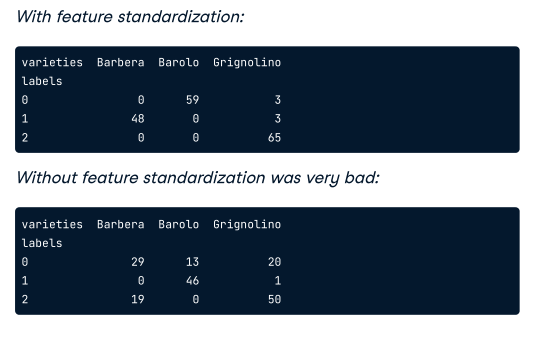
Checking the correspondence between the cluster labels and the wine varieties reveals that this new clustering, incorporating standardization. Its three clusters correspond almost exactly to the three wine varieties. This is a huge improvement on the clustering without standardization.


> StandardScaler is an example of a "preprocessing" step. There are several of these available in scikit-learn, for example MaxAbsScaler and Normalizer.

**Scaling fish data for clustering**

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

* Import:
  * make_pipeline from sklearn.pipeline.
  * StandardScaler from sklearn.preprocessing.
  * KMeans from sklearn.cluster.
* Create an instance of StandardScaler called scaler.
* Create an instance of KMeans with 4 clusters called kmeans.
* Create a pipeline called pipeline that chains scaler and kmeans. To do this, you just need to pass them in as arguments to make_pipeline().

```
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
```

**Clustering the fish data**

Use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements.

* Import pandas as pd.
* Fit the pipeline to the fish measurements samples.
* Obtain the cluster labels for samples by using the .predict() method of pipeline.
* Using pd.DataFrame(), create a DataFrame df with two columns named 'labels' and 'species', using labels and species, respectively, for the column values.
* Using pd.crosstab(), create a cross-tabulation ct of df['labels'] and df['species'].

```
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)
```

```
<script.py> output:
    species  Bream  Pike  Roach  Smelt
    labels                            
    0            0     0      0     13
    1           33     0      1      0
    2            0    17      0      0
    3            1     0     19      1
```

>  It looks like the fish data separates really well into 4 clusters!

**Clustering stocks using KMeans**

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, **Normalizer()** *rescales each sample - here, each company's stock price - independently of the other.*

* Import Normalizer from sklearn.preprocessing.
* Create an instance of Normalizer called normalizer.
* Create an instance of KMeans called kmeans with 10 clusters.
* Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
* Fit the pipeline to the movements array.

```
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)
```

> Now that your pipeline has been set up, you can find out which stocks move together.

**Which stocks move together?**

So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

 In addition, a list companies of the company names is available.

 *Import pandas as pd.
* Use the .predict() method of the pipeline to predict the labels for movements.
* Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns. This has been done for you.
* Use the .sort_values() method of df to sort the DataFrame by the 'labels' column, and print the result.

```
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))
```

```
<script.py> output:
        labels                           companies
    59       0                               Yahoo
    15       0                                Ford
    35       0                            Navistar
    26       1                      JPMorgan Chase
    16       1                   General Electrics
    58       1                               Xerox
    11       1                               Cisco
    18       1                       Goldman Sachs
    20       1                          Home Depot
    5        1                     Bank of America
    3        1                    American express
    55       1                         Wells Fargo
    1        1                                 AIG
    38       2                               Pepsi
    40       2                      Procter Gamble
    28       2                           Coca Cola
    27       2                      Kimberly-Clark
    9        2                   Colgate-Palmolive
    54       3                            Walgreen
    36       3                    Northrop Grumman
    29       3                     Lookheed Martin
    4        3                              Boeing
    0        4                               Apple
    47       4                            Symantec
    33       4                           Microsoft
    32       4                                  3M
    31       4                           McDonalds
    30       4                          MasterCard
    50       4  Taiwan Semiconductor Manufacturing
    14       4                                Dell
    17       4                     Google/Alphabet
    24       4                               Intel
    23       4                                 IBM
    2        4                              Amazon
    51       4                   Texas instruments
    43       4                                 SAP
    45       5                                Sony
    48       5                              Toyota
    21       5                               Honda
    22       5                                  HP
    34       5                          Mitsubishi
    7        5                               Canon
    56       6                            Wal-Mart
    57       7                               Exxon
    44       7                        Schlumberger
    8        7                         Caterpillar
    10       7                      ConocoPhillips
    12       7                             Chevron
    13       7                   DuPont de Nemours
    53       7                       Valero Energy
    39       8                              Pfizer
    41       8                       Philip Morris
    25       8                   Johnson & Johnson
    49       9                               Total
    46       9                      Sanofi-Aventis
    37       9                            Novartis
    42       9                   Royal Dutch Shell
    19       9                     GlaxoSmithKline
    52       9                            Unilever
    6        9            British American Tobacco
```



##Visualization with hierarchical clustering and t-SNE

Hierarchical clustering arranges samples into a hierarchy of clusters, and can organize any sort of data into a hierarchy. 

Let's consider a new type of dataset, describing how countries scored performances at the Eurovision 2016 song contest. The data is arranged in a rectangular array, where the rows of the array show how many points a country gave to each song. 

> The "samples" in this case are the countries.

The result of applying hierarchical clustering to the Eurovision scores can be visualized as a tree-like diagram called a "dendrogram". This single picture reveals a great deal of information about the voting behavior of countries at the Eurovision.

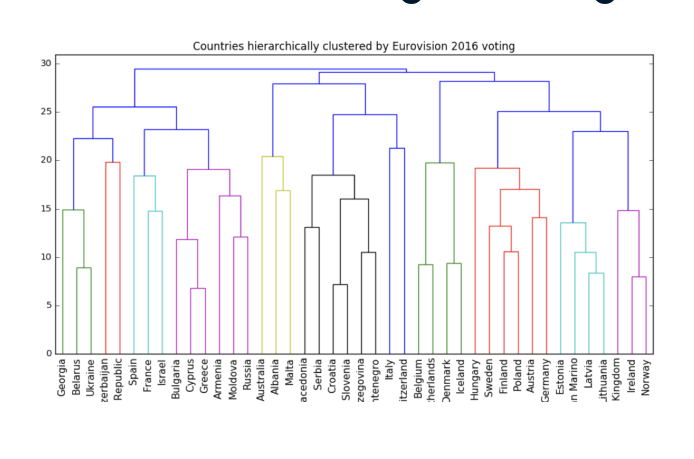

The dendrogram groups the countries into larger and larger clusters, and many of these clusters are immediately recognizable as containing countries that are close to one another geographically, or that have close cultural or political ties, or that belong to single language group.

Hierarchical clustering proceeds in steps. In the beginning, every country is its own cluster - so there are as many clusters as there are countries!

> At each step, the two closest clusters are merged. This decreases the number of clusters, and eventually, there is only one cluster left, and it contains all the countries. 

! there is also "divisive clustering", which works the other way around.

**Hierarchical clustering with SciPy**

> We'll use functions from scipy to perform a hierarchical clustering on the array of scores.

For the dendrogram, we'll also need a list of country names. 

* import the linkage and dendrogram functions. Then, apply the linkage function to the sample array.

```
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
```

> **Its the linkage function that performs the hierarchical clustering.** 

* pass the output of linkage to the dendrogram function, specifying the list of country names as the labels parameter. 

```
dendrogram(mergings,
labels=country_names,
leaf_rotation=90,
leaf_font_size=6)
plt.show()
```


**Hierarchical clustering of the grain data**

Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

* Import:
  * linkage and dendrogram from scipy.cluster.hierarchy.
  * matplotlib.pyplot as plt.
* Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to mergings.
* Plot a dendrogram using the dendrogram() function on mergings. Specify the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.

```
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()
```

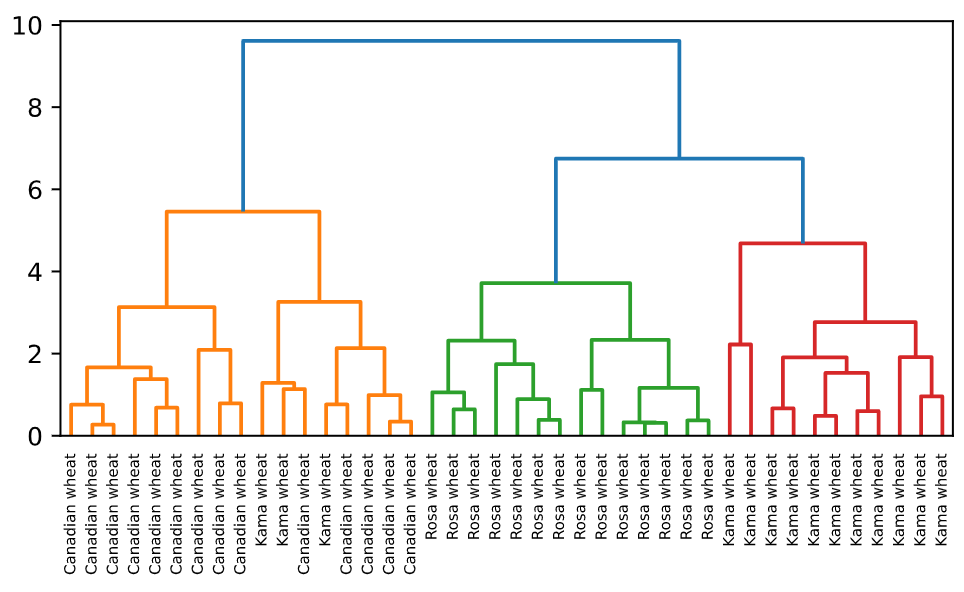


**Hierarchies of stocks**

 you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

 * Import normalize from sklearn.preprocessing.
* Rescale the price movements for each stock by using the normalize() function on movements.
* Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. Assign the result to mergings.
* Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.

```
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()
```

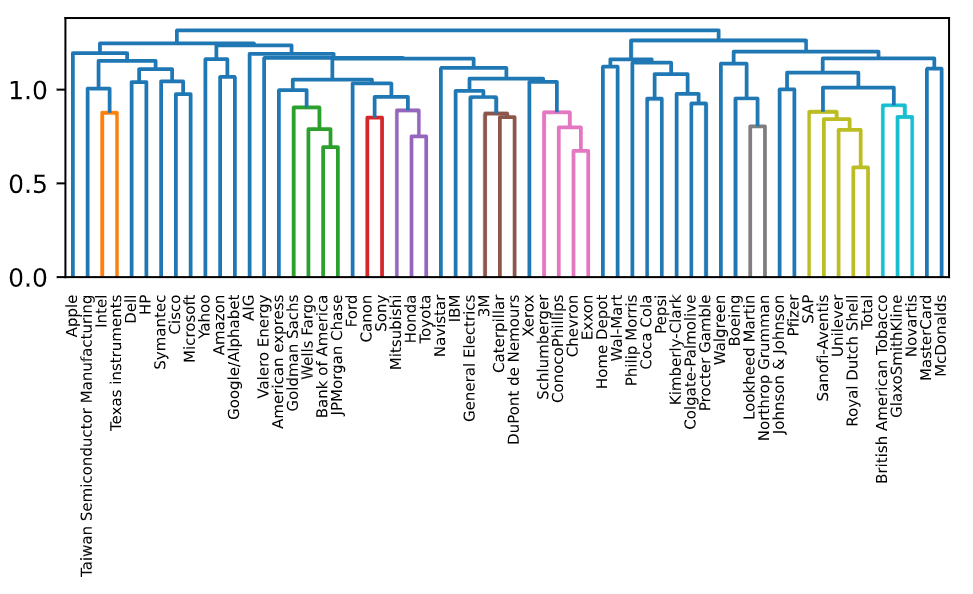

> You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations.

###Cluster labels in hierarchical clustering

The **cluster labels** for these intermediate clusterings **can then be used in further computations, such as cross tabulations**, just like the cluster labels from k-means.

> An intermediate stage in the hierarchical clustering is specified by *choosing a height on the dendrogram*.

For example, choosing a height of 15 defines a clustering in which Bulgaria, Cyprus and Greece are in one cluster, Russia and Moldova are in another, and Armenia is in a cluster on its own. 

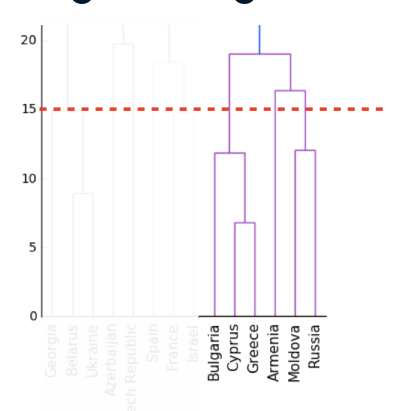



The y-axis of the dendrogram encodes the distance between merging clusters.

So the height that specifies an intermediate clustering corresponds to a distance. This specifies that the **hierarchical clustering should stop merging clusters when all clusters are at least this far apart**.

> The distance between two clusters is measured using a "linkage method".

*In our example, we used "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples.*

The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function.

**Extracting cluster labels using fcluster**

* After performing the hierarchical clustering of the Eurovision data, import the fcluster function. Then pass the result of the linkage function to the fcluster function, specifying the height as the second argument. This returns a numpy array containing the cluster labels for all the countries.

```
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)
[ 9 8 11 20 2 1 17 14 ... ]
```

* To inspect cluster labels, let's use a DataFrame to align the labels with the country names. Firstly, import pandas, then create the data frame, and then sort by cluster label, printing the result.

```
import pandas as pd
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
print(pairs.sort_values('labels'))
```

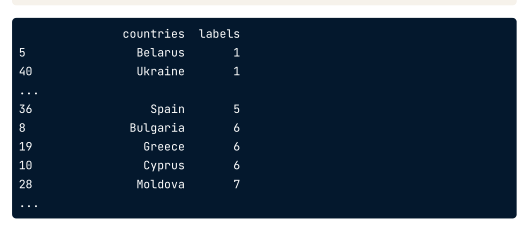

As expected, the cluster labels group Bulgaria, Greece and Cyprus in the same cluster. But do note that the **scipy cluster labels start at 1, not at 0 like they do in scikit-learn**.

>  In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

**Different linkage, different hierarchical clustering!**

Perform a hierarchical clustering of the voting countries with 'single' linkage.

 You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. 


* Import linkage and dendrogram from scipy.cluster.hierarchy.
* Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
* Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.

```
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()
```

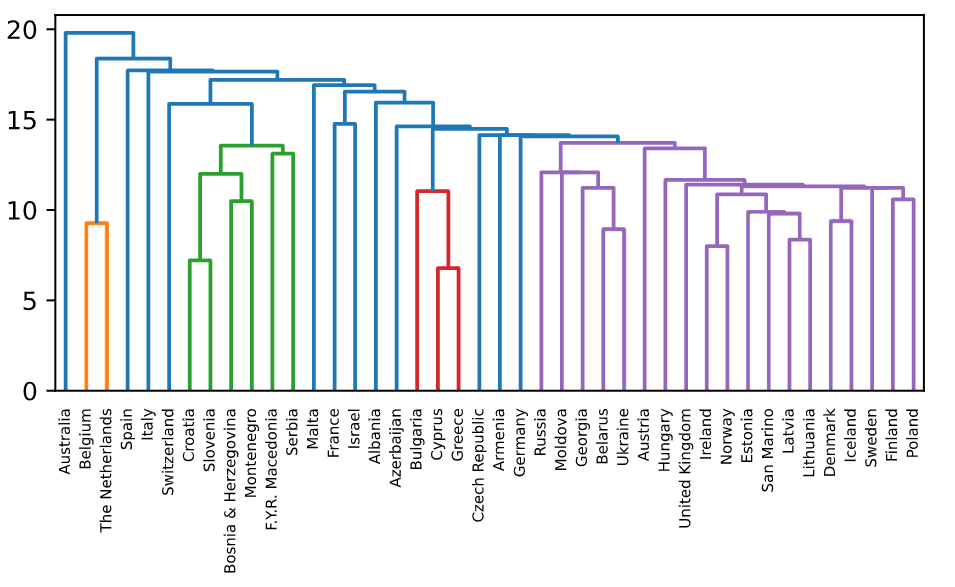



>  As you can see, performing single linkage hierarchical clustering produces a different dendrogram!

**Extracting the cluster labels**

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

* Import:
  * pandas as pd.
  * fcluster from scipy.cluster.hierarchy.
* Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
* Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
* Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

```
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)
```

```
<script.py> output:
    varieties  Canadian wheat  Kama wheat  Rosa wheat
    labels                                           
    1                      14           3           0
    2                       0           0          14
    3                       0          11           0
```

###t-SNE for 2-dimensional maps

t-SNE stands for "**t-distributed stochastic neighbor embedding**". 

>  It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized.

While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. 

The iris samples are in a four dimensional space, where each dimension corresponds to one of the four iris measurements, such as petal length and petal width. 

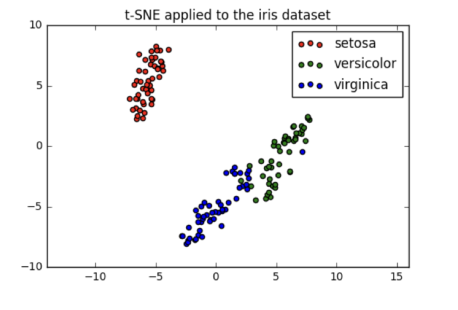

> We learn that there are two iris species, versicolor and virginica, whose samples are close together in space. So it could happen that the iris dataset appears to have two clusters, instead of three. 

*This is compatible with our previous examples using k-means, where we saw that a clustering with 2 clusters also had relatively low inertia, meaning tight clusters.*

**t-SNE in sklearn**

t-SNE is available in scikit-learn, but it works a little differently to the fit/transform components you've already met. 

 The samples are in a 2-dimensional numpy array, and there is a list giving the species of each sample.

 *  import TSNE and create a TSNE object. Apply the fit_transform method to the samples, and then make a scatter plot of the result, coloring the points using the species.

 ```
 import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()
```
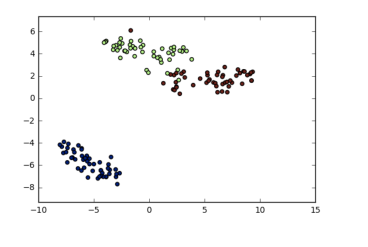


> There are two aspects that deserve special attention: the fit_transform method, and the learning rate.

**t-SNE has only fit_transform()**

The fit_transform method simultaneously fits the model and transforms the data. 

t-SNE does not have separate fit and transform methods. This means that **you can't extend a t-SNE map to include new samples. Instead, you have to start over each time.**

**t-SNE learning rate** The learning rate makes the use of t-SNE more complicated than some other techniques. 

You may need to try different learning rates for different datasets. It is clear, however, when you've made a bad choice, because all the samples appear bunched together in the scatter plot. 

>  Normally it's enough to try a few values between 50 and 200.

**Different every time**

 t-SNE plot do not have any interpretable meaning.

 *In fact, they are different every time t-SNE is applied, even on the same data.*

 **t-SNE visualization of grain dataset**

In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

* Import TSNE from sklearn.manifold.
* Create a TSNE instance called model with learning_rate=200.
* Apply the .fit_transform() method of model to samples. Assign the result to tsne_features.
* Select the column 0 of tsne_features. Assign the result to xs.
* Select the column 1 of tsne_features. Assign the result to ys.
* Make a scatter plot of the t-SNE features xs and ys. To color the points by the grain variety, specify the additional keyword argument c=variety_numbers.

```
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()
```

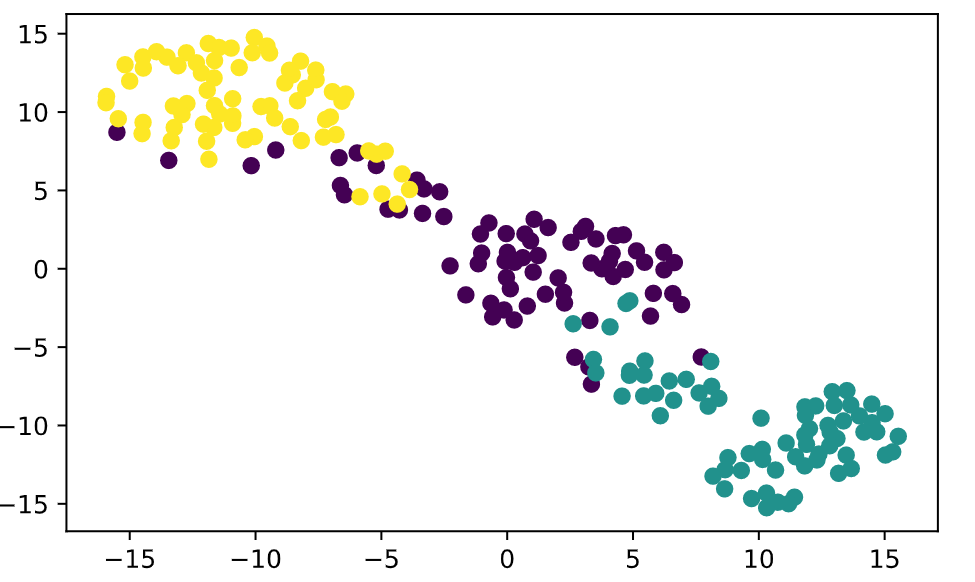


> As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data?

**A t-SNE map of the stock market**

*t-SNE provides great visualizations when the individual samples can be labeled.*

In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. 

* Import TSNE from sklearn.manifold.
* Create a TSNE instance called model with learning_rate=50.
* Apply the .fit_transform() method of model to normalized_movements. Assign the result to tsne_features.
* Select column 0 and column 1 of tsne_features.
* Make a scatter plot of the t-SNE features xs and ys. Specify the additional keyword argument alpha=0.5.

```
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
```

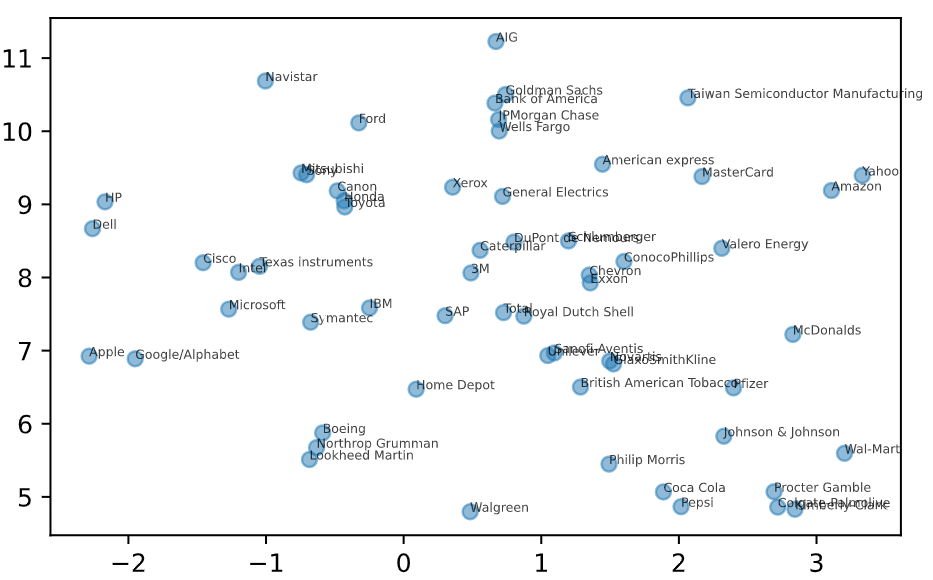

##Decorrelating your data and dimension reduction

###Visualizing the PCA transformation



##Discovering interpretable features